## **AI Image Recognition Challenge: Chihuahua and Muffin**

In [1]:
#Include necessary packages
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import random
from keras.callbacks import EarlyStopping

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
# Set random seed values for reproducibility
seed_value = 123
# Set the seed for Python's random number generator
random.seed(seed_value)

# Set the seed for NumPy
np.random.seed(seed_value)

# Set the seed for TensorFlow
tf.random.set_seed(seed_value)

**Training and Validation of the model**

In [3]:
# Constants
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 2
EPOCHS = 50

# loading datset into training and validation variable
train_dir = "/kaggle/input/chihuahua-muffin/train/train"
valid_dir = "/kaggle/input/chihuahua-muffin/validation/validation"
test_dir = "/kaggle/input/chihuahua-muffin/test/test"

**Preprocessing and Data augmentation**

In [4]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255.0)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    seed=seed_value
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
)


Found 3840 images belonging to 2 classes.
Found 1280 images belonging to 2 classes.


**Sample Data**

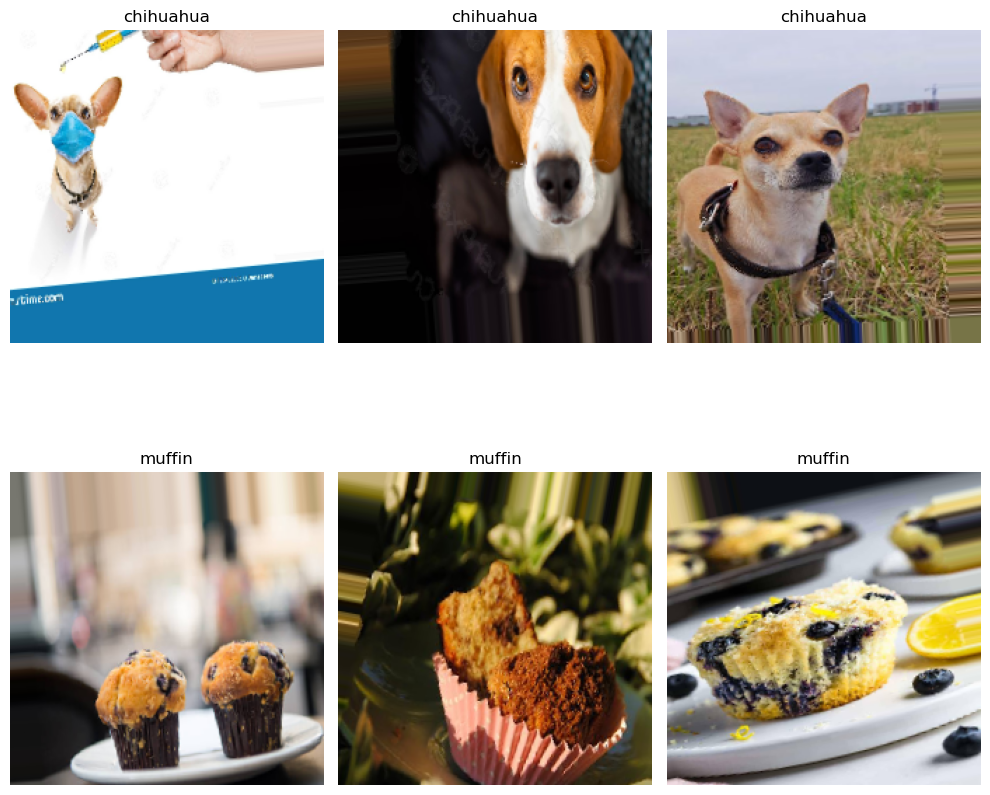

In [5]:
# Get class names
class_names = list(train_generator.class_indices.keys())

# Get a batch of images and labels from the generator
images, labels = next(train_generator)

augmented_images = np.array([train_datagen.random_transform(image) for image in images])

# Plot a few samples of each category
num_samples = 3
num_categories = len(class_names)

plt.figure(figsize=(10, 10))

for i in range(num_categories):
    category_indices = labels[:, i] == 1
    category_samples = images[category_indices][:num_samples]
    
    for j in range(num_samples):
        plt.subplot(num_categories, num_samples, i * num_samples + j + 1)
        plt.imshow(category_samples[j])
        plt.title(class_names[i])
        plt.axis("off")

plt.tight_layout()
plt.show()


**Augumented Data**

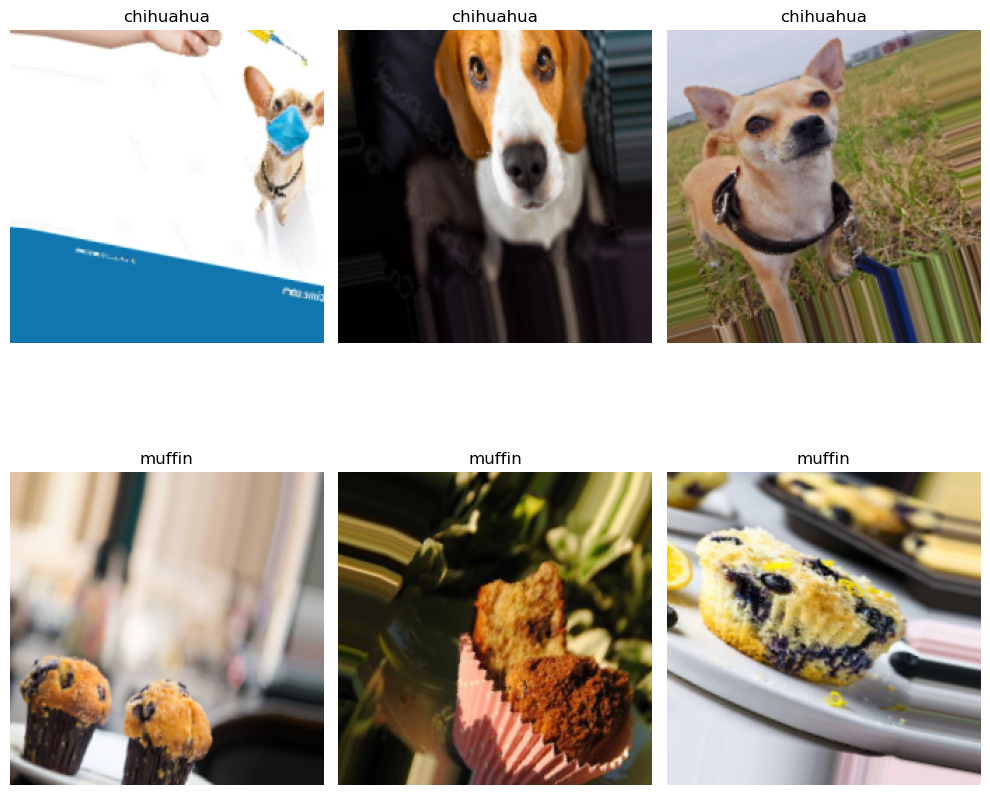

In [6]:
plt.figure(figsize=(10, 10))

for i in range(num_categories):
    category_indices = labels[:, i] == 1
    category_augmented_samples = augmented_images[category_indices][:num_samples]

    for j in range(num_samples):
        plt.subplot(num_categories, num_samples, i * num_samples + j + 1)
        plt.imshow(category_augmented_samples[j])
        plt.title(class_names[i])
        plt.axis("off")

plt.tight_layout()
plt.show()

### **Transfer learning - VGG19 model**

In [7]:

# Load pre-trained VGG19 model
base_model = VGG19(input_shape=(*IMAGE_SIZE, 3), include_top=False, weights='imagenet')

# Freeze the base model's layers to prevent training them
base_model.trainable = False

# Create a new model by adding custom layers on top of the base model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation="softmax"))

# Compile the model
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

# Callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, r
                               estore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=valid_generator,
    validation_steps=valid_generator.n // BATCH_SIZE,
    callbacks=[early_stopping]
)

# Save the model
model.save("chihuahua_muffin_classifier_vgg19.h5")


80134624/80134624 [==============================] - 1s 0us/step
Epoch 1/50
120/120 [==============================] - 130s 999ms/step - loss: 0.9154 - accuracy: 0.8237 - val_loss: 0.1602 - val_accuracy: 0.9289
Epoch 2/50
120/120 [==============================] - 86s 716ms/step - loss: 0.2696 - accuracy: 0.8917 - val_loss: 0.1555 - val_accuracy: 0.9414
Epoch 3/50
120/120 [==============================] - 86s 720ms/step - loss: 0.2371 - accuracy: 0.9013 - val_loss: 0.1377 - val_accuracy: 0.9477
Epoch 4/50
120/120 [==============================] - 85s 709ms/step - loss: 0.2329 - accuracy: 0.9026 - val_loss: 0.1956 - val_accuracy: 0.9219
Epoch 5/50
120/120 [==============================] - 86s 712ms/step - loss: 0.2312 - accuracy: 0.9073 - val_loss: 0.1273 - val_accuracy: 0.9508
Epoch 6/50
120/120 [==============================] - 87s 723ms/step - loss: 0.2073 - accuracy: 0.9138 - val_loss: 0.1317 - val_accuracy: 0.9492
Epoch 7/50
120/120 [==============================] - 84s 698ms/

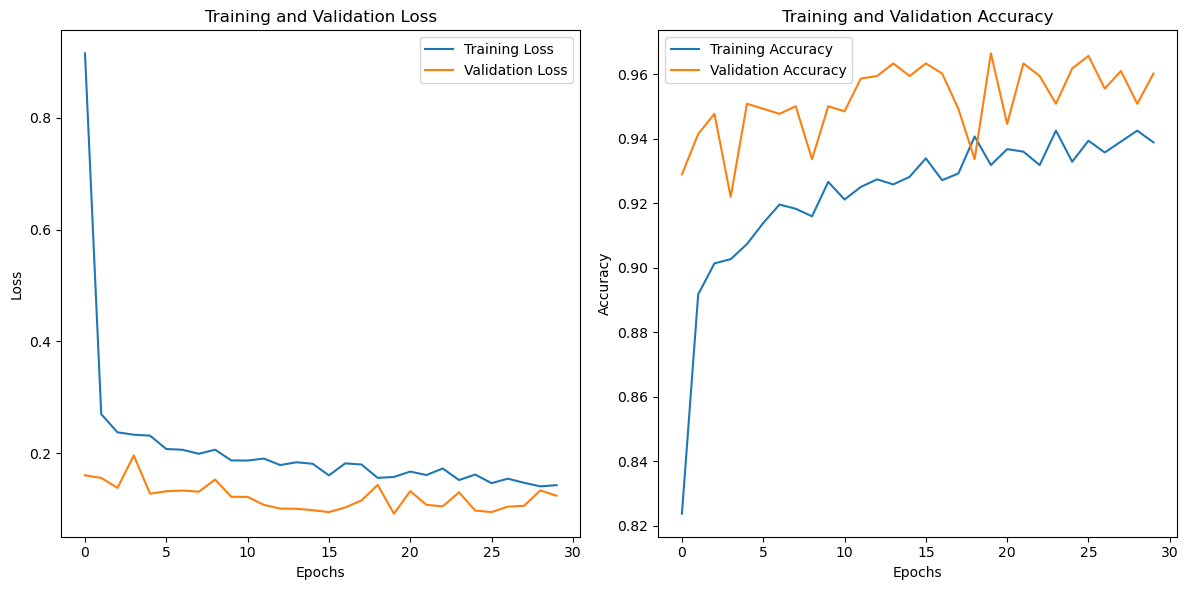

In [8]:
#Plot of training and validation loss and accuracy

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

**Testing and Evaluation of the model fitted**

Found 1280 images belonging to 2 classes.
40/40 [==============================] - 16s 409ms/step


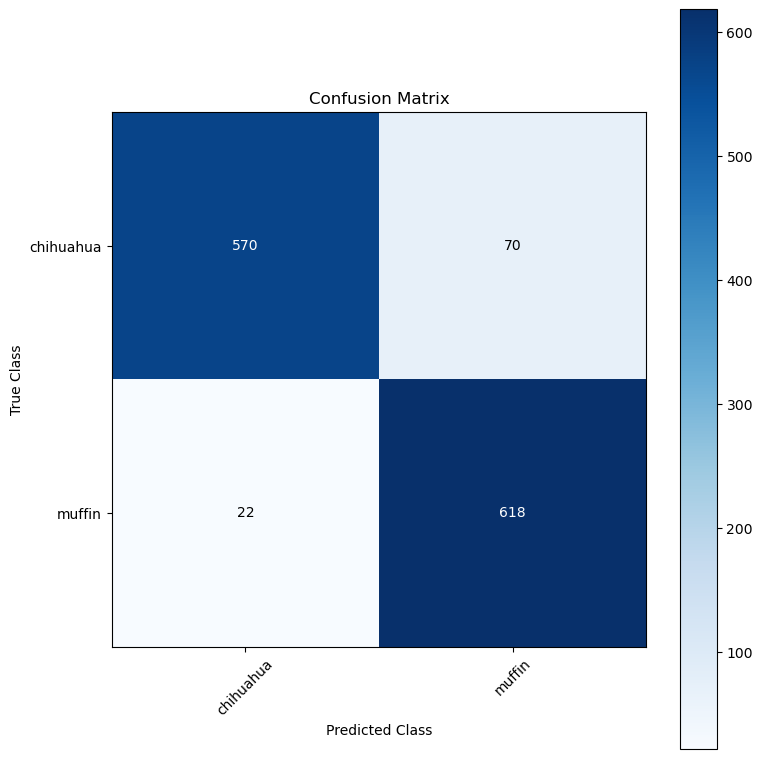

Classification Report:
              precision    recall  f1-score   support

   chihuahua       0.96      0.89      0.93       640
      muffin       0.90      0.97      0.93       640

    accuracy                           0.93      1280
   macro avg       0.93      0.93      0.93      1280
weighted avg       0.93      0.93      0.93      1280



In [9]:
# Load the model
model = tf.keras.models.load_model("chihuahua_muffin_classifier_vgg19.h5")

# Create the test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    classes=["chihuahua", "muffin"],
    shuffle=False,
)

# Evaluate the model on the test dataset
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 8))
plt.imshow(conf_matrix, cmap="Blues", interpolation="nearest")
plt.colorbar()
tick_marks = np.arange(NUM_CLASSES)
plt.xticks(tick_marks, test_generator.class_indices, rotation=45)
plt.yticks(tick_marks, test_generator.class_indices)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")

# Annotate the cells with the values
for i in range(NUM_CLASSES):
    for j in range(NUM_CLASSES):
        plt.text(j, i, str(conf_matrix[i, j]),
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.tight_layout()
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices))


### **Sequential CNN**

**Training and validation of the model**

In [10]:
# Build the Sequential model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(*IMAGE_SIZE, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation="softmax"))

# Compile the model
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)
          
# Set up early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=valid_generator,
    validation_steps=valid_generator.n // BATCH_SIZE,
    callbacks=[early_stopping]
)

# Save the model
model.save("chihuahua_muffin_classifier_sequential.h5")

Epoch 1/50
120/120 [==============================] - 86s 668ms/step - loss: 0.7656 - accuracy: 0.5396 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 2/50
120/120 [==============================] - 82s 682ms/step - loss: 0.6992 - accuracy: 0.5195 - val_loss: 0.6908 - val_accuracy: 0.5383
Epoch 3/50
120/120 [==============================] - 80s 668ms/step - loss: 0.6832 - accuracy: 0.5904 - val_loss: 0.6632 - val_accuracy: 0.6531
Epoch 4/50
120/120 [==============================] - 80s 672ms/step - loss: 0.6077 - accuracy: 0.6706 - val_loss: 0.4365 - val_accuracy: 0.8172
Epoch 5/50
120/120 [==============================] - 79s 658ms/step - loss: 0.5191 - accuracy: 0.7826 - val_loss: 0.4449 - val_accuracy: 0.8336
Epoch 6/50
120/120 [==============================] - 80s 670ms/step - loss: 0.4380 - accuracy: 0.8305 - val_loss: 0.3505 - val_accuracy: 0.8570
Epoch 7/50
120/120 [==============================] - 80s 670ms/step - loss: 0.3799 - accuracy: 0.8464 - val_loss: 0.2870 - val_ac

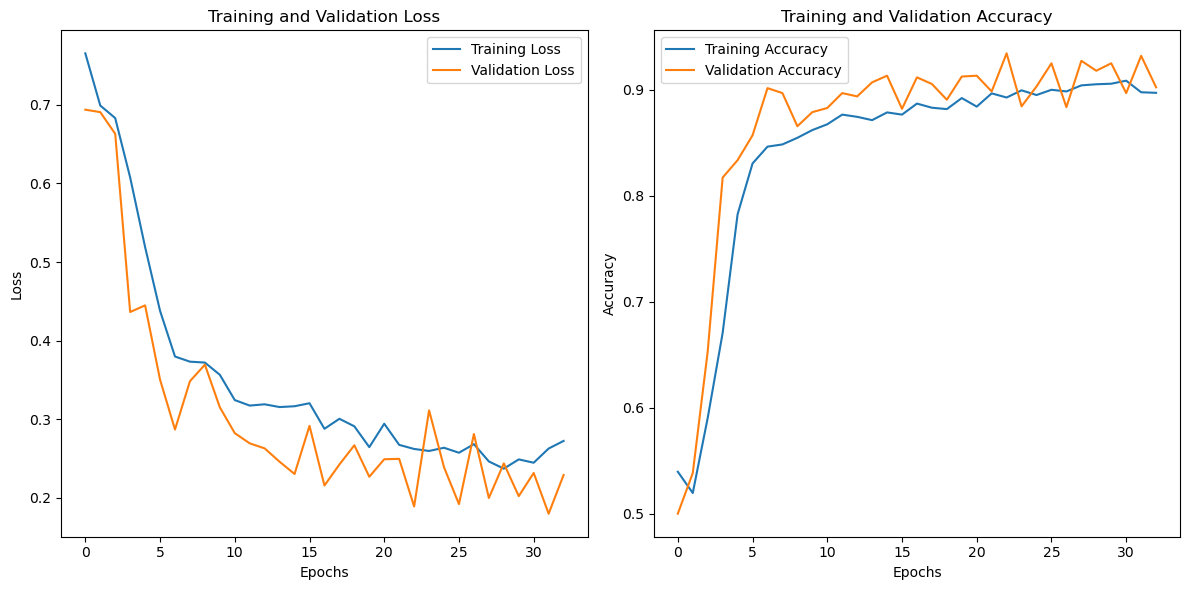

In [11]:
#Plot of training and validation loss and accuracy

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Found 1280 images belonging to 2 classes.
40/40 [==============================] - 8s 186ms/step


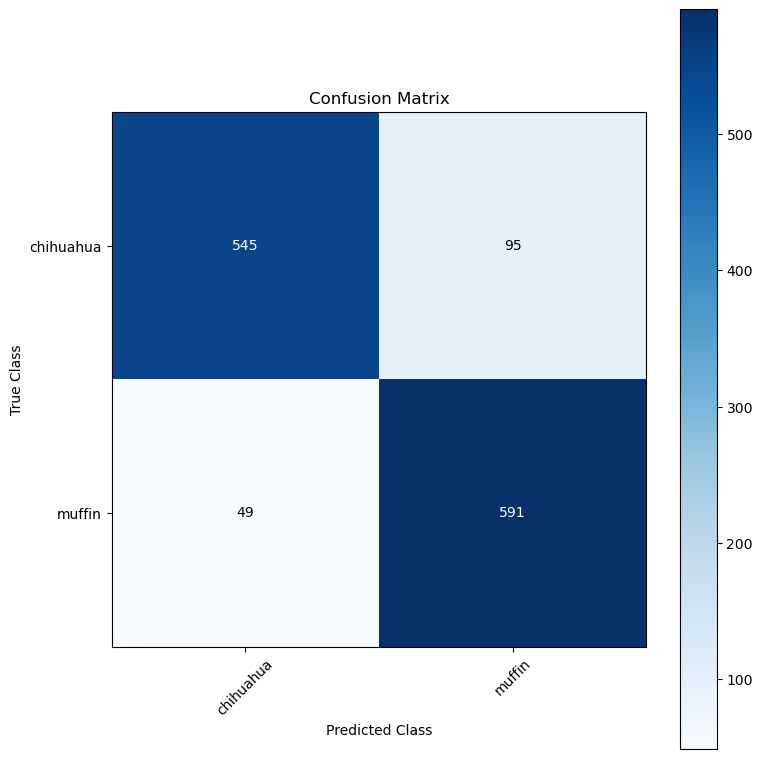

Classification Report:
              precision    recall  f1-score   support

   chihuahua       0.92      0.85      0.88       640
      muffin       0.86      0.92      0.89       640

    accuracy                           0.89      1280
   macro avg       0.89      0.89      0.89      1280
weighted avg       0.89      0.89      0.89      1280



In [12]:
# Load the model
model = tf.keras.models.load_model("chihuahua_muffin_classifier_sequential.h5")

# Create the test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    classes=["chihuahua", "muffin"],
    shuffle=False,
)

# Evaluate the model on the test dataset
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 8))
plt.imshow(conf_matrix, cmap="Blues", interpolation="nearest")
plt.colorbar()
tick_marks = np.arange(NUM_CLASSES)
plt.xticks(tick_marks, test_generator.class_indices, rotation=45)
plt.yticks(tick_marks, test_generator.class_indices)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")

# Annotate the cells with the values
for i in range(NUM_CLASSES):
    for j in range(NUM_CLASSES):
        plt.text(j, i, str(conf_matrix[i, j]),
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.tight_layout()
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices))

### **Further enhancement of VGG19**

**Imbalanced Dataset**

In [13]:
# Data directories
train_dir = "/kaggle/input/chihuahua-muffin-imbalanced/train/train"
valid_dir = "/kaggle/input/chihuahua-muffin-imbalanced/validation/validation"
test_dir = "/kaggle/input/chihuahua-muffin-imbalanced/test/test"

# Preprocessing and data augmentation
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
)


Found 3421 images belonging to 2 classes.
Found 1180 images belonging to 2 classes.


**Training and evaluation of the model**

In [14]:
# Calculate class weights
total_samples = train_generator.samples
class_weights = {0: total_samples / (2 * np.bincount(train_generator.classes)[0]),
                 1: total_samples / (2 * np.bincount(train_generator.classes)[1])}

# Load pre-trained VGG19 model
base_model = VGG19(input_shape=(*IMAGE_SIZE, 3), include_top=False, weights='imagenet')

# Freeze the base model's layers to prevent training them
base_model.trainable = False

# Create a new model by adding custom layers on top of the base model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation="softmax"))

# Compile the model
model.compile(
    optimizer="adam", loss="categorical_crossentropy",
    metrics=[tf.keras.metrics.Precision(name='precision'), 
             tf.keras.metrics.Recall(name='recall'),
             tf.keras.metrics.AUC(name='auc'),
             tf.keras.metrics.TruePositives(name='tp'),
             tf.keras.metrics.TrueNegatives(name='tn'),
             tf.keras.metrics.FalsePositives(name='fp'),
             tf.keras.metrics.FalseNegatives(name='fn')]
)

# Callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=valid_generator,
    validation_steps=valid_generator.n // BATCH_SIZE,
    class_weight=class_weights,
    callbacks=[early_stopping]
)

# Save the model
model.save("chihuahua_muffin_classifier_vgg19_imbalance.h5")


Epoch 1/50
106/106 [==============================] - 112s 1s/step - loss: 0.7540 - precision: 0.8289 - recall: 0.8289 - auc: 0.8859 - tp: 2809.0000 - tn: 2809.0000 - fp: 580.0000 - fn: 580.0000 - val_loss: 0.1654 - val_precision: 0.9427 - val_recall: 0.9427 - val_auc: 0.9838 - val_tp: 1086.0000 - val_tn: 1086.0000 - val_fp: 66.0000 - val_fn: 66.0000
Epoch 2/50
106/106 [==============================] - 78s 739ms/step - loss: 0.2754 - precision: 0.8914 - recall: 0.8914 - auc: 0.9553 - tp: 3021.0000 - tn: 3021.0000 - fp: 368.0000 - fn: 368.0000 - val_loss: 0.1502 - val_precision: 0.9479 - val_recall: 0.9479 - val_auc: 0.9874 - val_tp: 1092.0000 - val_tn: 1092.0000 - val_fp: 60.0000 - val_fn: 60.0000
Epoch 3/50
106/106 [==============================] - 77s 722ms/step - loss: 0.2418 - precision: 0.9038 - recall: 0.9038 - auc: 0.9642 - tp: 3063.0000 - tn: 3063.0000 - fp: 326.0000 - fn: 326.0000 - val_loss: 0.1272 - val_precision: 0.9592 - val_recall: 0.9592 - val_auc: 0.9904 - val_tp: 110

<Figure size 1200x600 with 0 Axes>

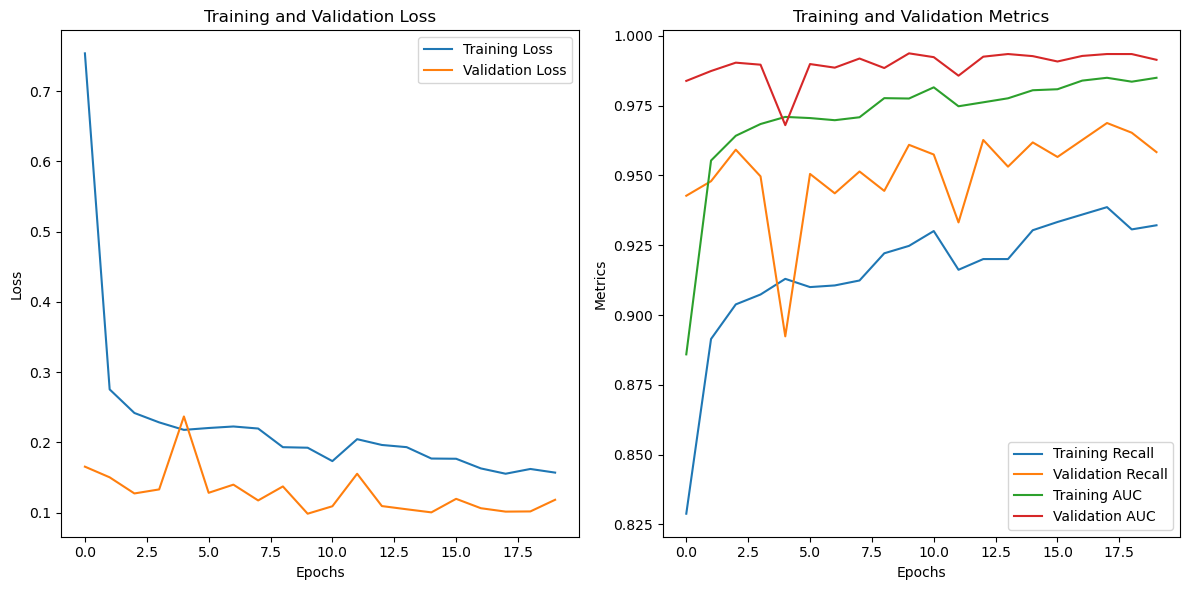

In [15]:
#Plot of training and validation loss and metrics
plt.figure(figsize=(12, 6))

# Plot training and validation metrics
# Extract the training history from the training log
training_loss = history.history['loss']
training_precision = history.history['precision']
training_recall = history.history['recall']
training_auc = history.history['auc']

# Extract the validation history from the training log
val_loss = history.history['val_loss']
val_precision = history.history['val_precision']
val_recall = history.history['val_recall']
val_auc = history.history['val_auc']

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.savefig("loss_imbalance.png")

# Plot training and validation metrics

plt.subplot(1, 2, 2)

plt.plot(training_recall, label='Training Recall')
plt.plot(val_recall, label='Validation Recall')
plt.plot(training_auc, label='Training AUC')
plt.plot(val_auc, label='Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Training and Validation Metrics')
plt.legend()

plt.savefig("metrics_imbalance.png")

plt.tight_layout()
plt.show()



**Testing the model Fitted**

In [16]:
# Preprocessing for test data
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255.0)

Found 1180 images belonging to 2 classes.
37/37 [==============================] - 17s 454ms/step


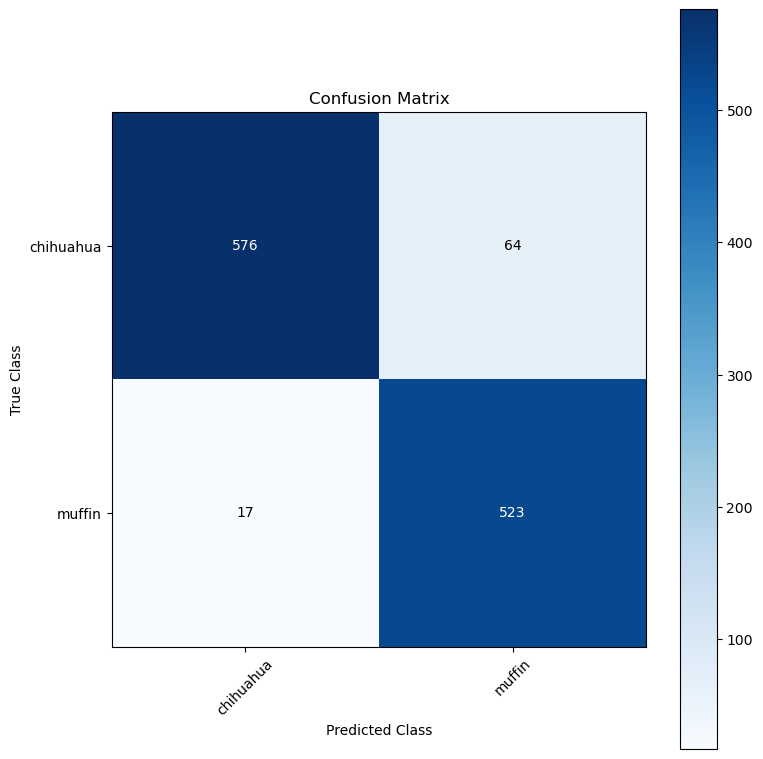

Classification Report:
              precision    recall  f1-score   support

   chihuahua       0.97      0.90      0.93       640
      muffin       0.89      0.97      0.93       540

    accuracy                           0.93      1180
   macro avg       0.93      0.93      0.93      1180
weighted avg       0.93      0.93      0.93      1180



In [17]:
# Load the model
model = tf.keras.models.load_model("chihuahua_muffin_classifier_vgg19_imbalance.h5")

# Create the test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    classes=["chihuahua", "muffin"],
    shuffle=False,  # Important: Keep the order of samples to match the true labels
)

# Evaluate the model on the test dataset
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 8))
plt.imshow(conf_matrix, cmap="Blues", interpolation="nearest")
plt.colorbar()
tick_marks = np.arange(NUM_CLASSES)
plt.xticks(tick_marks, test_generator.class_indices, rotation=45)
plt.yticks(tick_marks, test_generator.class_indices)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")

# Annotate the cells with the values
for i in range(NUM_CLASSES):
    for j in range(NUM_CLASSES):
        plt.text(j, i, str(conf_matrix[i, j]),
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.tight_layout()
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices))

**Binary classification using VGG19**

In [18]:
# Data directories
train_dir = "/kaggle/input/chihuahua-vs-not-chihuahua/train/train"
valid_dir = "/kaggle/input/chihuahua-vs-not-chihuahua/validation/validation"
test_dir = "/kaggle/input/chihuahua-vs-not-chihuahua/test/test"

# Preprocessing and data augmentation
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255.0)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",  # Binary classification for chihuahua detection
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",  # Binary classification for chihuahua detection
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",  # Binary classification for chihuahua detection
    shuffle=False, 
)


Found 3840 images belonging to 2 classes.
Found 1280 images belonging to 2 classes.
Found 1280 images belonging to 2 classes.


**Training and Validation of the model**

In [19]:
# Load pre-trained VGG19 model
base_model = VGG19(input_shape=(*IMAGE_SIZE, 3), include_top=False, weights='imagenet')

# Freeze the base model's layers to prevent training them
base_model.trainable = False

# Create a new model by adding custom layers on top of the base model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))  # Binary classification

# Compile the model
model.compile(
    optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]
)

from keras.callbacks import EarlyStopping

# Callback for early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=valid_generator,
    validation_steps=valid_generator.n // BATCH_SIZE,
    callbacks=[early_stopping]
)

# Save the model
model.save("chihuahua_classifier_binary_vgg19.h5")

Epoch 1/50
120/120 [==============================] - 115s 943ms/step - loss: 1.0728 - accuracy: 0.7141 - val_loss: 0.3863 - val_accuracy: 0.8242
Epoch 2/50
120/120 [==============================] - 80s 665ms/step - loss: 0.4482 - accuracy: 0.7852 - val_loss: 0.3671 - val_accuracy: 0.8242
Epoch 3/50
120/120 [==============================] - 76s 630ms/step - loss: 0.4278 - accuracy: 0.7919 - val_loss: 0.3487 - val_accuracy: 0.8383
Epoch 4/50
120/120 [==============================] - 76s 632ms/step - loss: 0.4032 - accuracy: 0.8096 - val_loss: 0.3404 - val_accuracy: 0.8523
Epoch 5/50
120/120 [==============================] - 77s 643ms/step - loss: 0.4033 - accuracy: 0.8062 - val_loss: 0.3333 - val_accuracy: 0.8508
Epoch 6/50
120/120 [==============================] - 77s 645ms/step - loss: 0.3958 - accuracy: 0.8133 - val_loss: 0.3251 - val_accuracy: 0.8523
Epoch 7/50
120/120 [==============================] - 77s 639ms/step - loss: 0.3832 - accuracy: 0.8141 - val_loss: 0.3232 - val_a

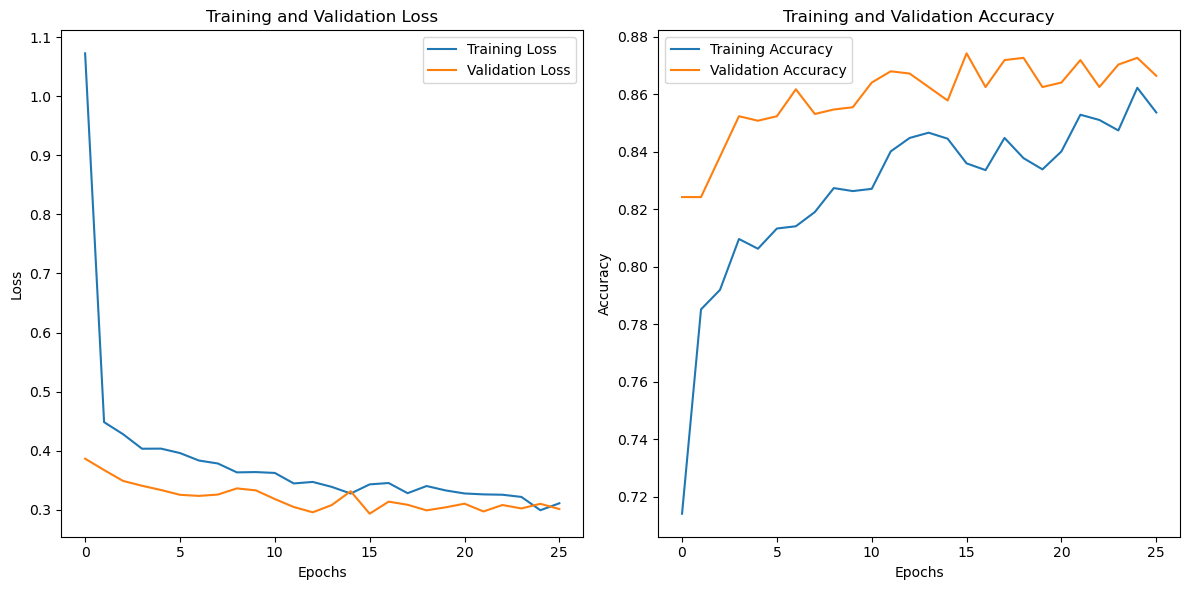

In [20]:
# Plot training and validation loss/accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

**Testing and Evaluation of the model**

Found 1280 images belonging to 2 classes.
40/40 [==============================] - 15s 383ms/step


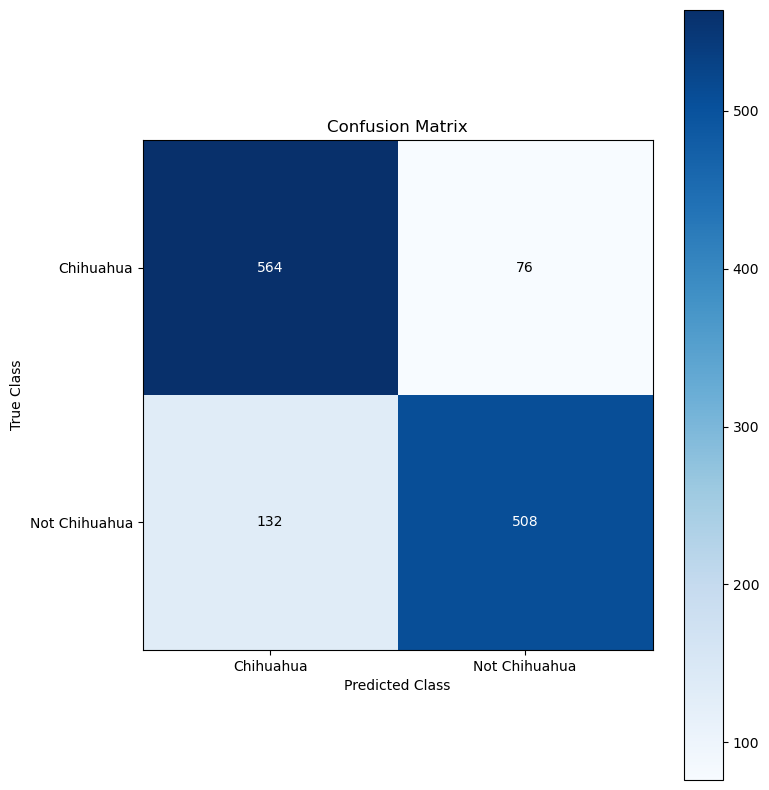

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       640
           1       0.87      0.79      0.83       640

    accuracy                           0.84      1280
   macro avg       0.84      0.84      0.84      1280
weighted avg       0.84      0.84      0.84      1280



In [21]:
# Load the model
model = tf.keras.models.load_model("chihuahua_classifier_binary_vgg19.h5")

# Create the test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",  
    shuffle=False, 
)

# Evaluate the model on the test dataset

y_true = test_generator.classes
y_pred_prob = model.predict(test_generator)
y_pred = np.round(y_pred_prob)  # Convert probabilities to binary predictions

# Create the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 8))
plt.imshow(conf_matrix, cmap="Blues", interpolation="nearest")
plt.colorbar()
plt.xticks([0, 1], ["Chihuahua", "Not Chihuahua"])
plt.yticks([0, 1], ["Chihuahua", "Not Chihuahua"])
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")

# Annotate the cells with the values
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]),
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.tight_layout()
plt.show()

#lassification Report
print("Classification Report:")
print(classification_report(y_true, y_pred))